In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('translations_scores/system_mittens_gender_context_basic_metric.csv')
df2 = pd.read_csv('translations_scores/system_mittens_gender_few_shot_basic_metric.csv')
df3 = pd.read_csv('translations_scores/system_mittens_gender_few_shot_two_step_basic_metric.csv')

In [3]:
df = pd.concat([df, df2], axis=1)
df = pd.concat([df, df3], axis=1)

df.head()

,bleu_no_context,chrf_no_context,comet_no_context,bertscore_no_context,bleu_with_context,chrf_with_context,comet_with_context,bertscore_with_context,bleu_with_context_two_steps,chrf_with_context_two_steps,comet_with_context_two_steps,bertscore_with_context_two_steps,bleu_few_shot,chrf_few_shot,comet_few_shot,bertscore_few_shot,bleu_few_shot_two_step,chrf_few_shot_two_step,comet_few_shot_two_step,bertscore_few_shot_two_step
0,0.457392,0.741682,0.926723,0.921509,0.442427,0.732677,0.929044,0.918923,0.430006,0.732997,0.92149,0.913778,0.474948,0.754511,0.923899,0.92262,0.454193,0.750418,0.929936,0.922603


In [13]:
values = df.values.flatten()

# Remove NaNs
values = [v for v in values if pd.notna(v)]

# Round each value to at most 3 decimal places
rounded_values = [round(float(v), 3) for v in values]

# Group into rows of 4
rows = [rounded_values[i:i+4] for i in range(0, len(rounded_values), 4)]

# Print each row in LaTeX tabular format
for row in rows:
    formatted = " & " + " & ".join(f"{v:.3f}" for v in row) + r" \\"
    print(formatted)

 & 0.457 & 0.742 & 0.927 & 0.922 \\
 & 0.442 & 0.733 & 0.929 & 0.919 \\
 & 0.430 & 0.733 & 0.921 & 0.914 \\
 & 0.475 & 0.755 & 0.924 & 0.923 \\
 & 0.454 & 0.750 & 0.930 & 0.923 \\


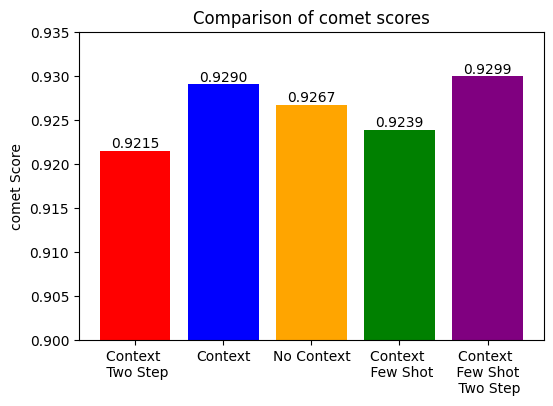

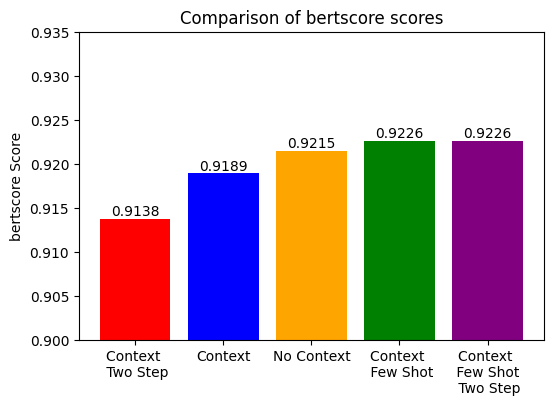

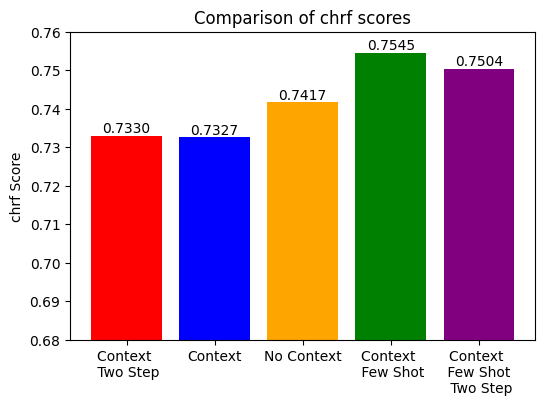

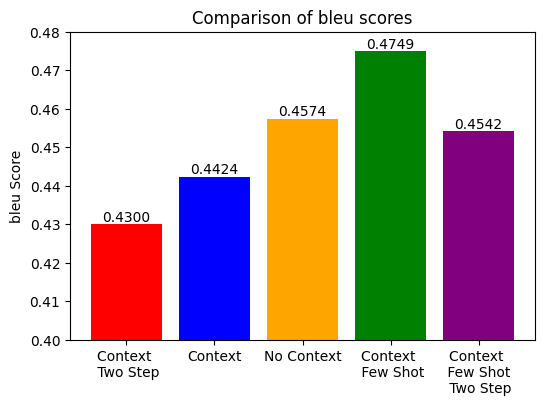

In [14]:
metrics = ['comet', 'bertscore', 'chrf', 'bleu']

# Tworzenie wykresów słupkowych
for metric in metrics:
    with_context_two_steps = df[f'{metric}_with_context_two_steps'].iloc[0]
    with_context = df[f'{metric}_with_context'].iloc[0]
    no_context = df[f'{metric}_no_context'].iloc[0]
    few_shot = df[f'{metric}_few_shot'].iloc[0]
    few_shot_two_step = df[f'{metric}_few_shot_two_step'].iloc[0]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(['Context \n Two Step', 'Context', 'No Context', 'Context \n Few Shot', 'Context \n Few Shot \n Two Step'], [with_context_two_steps, with_context, no_context, few_shot, few_shot_two_step], color=['red','blue', 'orange', 'green', 'purple'])
    plt.title(f'Comparison of {metric} scores')
    plt.ylabel(f'{metric} Score')

    if metric == "chrf":
        plt.ylim(0.68, 0.76)
    elif metric == "bleu":
        plt.ylim(0.4, 0.48)
    else:
        plt.ylim(0.9, 0.935)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

    plt.savefig(f"figs/{metric}_gender_context_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
df2 = pd.read_csv('results/mittens_gender_context.csv')
df3 = pd.read_csv('results/mittens_gender_few_shot.csv')
df4 = pd.read_csv('results/mittens_gender_few_shot_two_step.csv')

In [5]:
df2['few_shot'] = df3['few_shot']
df2['few_shot_two_step'] = df4['few_shot_two_step']
df2.head()

,pl_text,en_text,encoded_gender,no_context,with_context,with_context_two_steps,few_shot,few_shot_two_step
0,Al-Loubiri był zaangażowany w zarządzanie częś...,Al-Loubiri was involved in the administration ...,masculine,Al-Loubiri był zaangażowany w zarządzanie częś...,Al-Loubiri był zaangażowany w zarządzanie częś...,Al-Loubiri był zaangażowany w zarządzanie częś...,Al-Loubiri był zaangażowany w administrację cz...,Al-Loubiri był zaangażowany w zarządzanie częś...
1,Fiodor był najtrudniejszym z dzieci. Często kł...,Fyodor was the most difficult of the kids. He ...,masculine,Fiodor był najtrudniejszym z dzieci. Często kł...,Fiodor był najtrudniejszym z dzieci. Często kł...,Fiodor był najtrudniejszym z dzieci. Często kł...,Fiodor był najtrudniejszym z dzieci. Często kł...,Fiodor był najtrudniejszym z dzieci. Często kł...
2,Michael Milken chce pomóc zmienić tę sytuację....,Michael Milken wants to help change the situat...,masculine,Michael Milken chce pomóc zmienić sytuację. By...,Michael Milken chce pomóc zmienić sytuację. By...,Michael Milken chce pomóc zmienić sytuację. By...,Michael Milken chce pomóc zmienić sytuację. By...,Michael Milken chce pomóc zmienić sytuację. By...
3,Podczas drugiej wyprawy na Florydę Ponce de Le...,"For the second Florida expedition, Ponce de Le...",masculine,"Dla drugiej wyprawy do Florydy, Ponce de León ...",Dla drugiej wyprawy do Florydy Ponce de León z...,"Dla drugiej wyprawy do Florydy, Juan Ponce de ...","Dla drugiej ekspedycji do Florydy, Ponce de Le...","Dla drugiej wyprawy do Florydy, Ponce de León ..."
4,"George był jednym z pierwszych, którzy ostrzeg...",George was one of the first to alert the world...,masculine,"George był jednym z pierwszych, którzy ostrzeg...","George był jednym z pierwszych, którzy zaalarm...","George był jednym z pierwszych, który ostrzegł...","George był jednym z pierwszych, który ostrzegł...","George był jednym z pierwszych, którzy ostrzeg..."


In [6]:
from morfeusz2 import Morfeusz
morfeusz = Morfeusz()

In [7]:
from collections import Counter

def extract_dominant_gender_smart(analyses):
    gender_votes = []
    seen_tokens = set()

    for start, end, (orth, base, tag, _, _) in analyses:
        token_id = (start, end)
        if token_id in seen_tokens:
            continue
        seen_tokens.add(token_id)

        tag_parts = tag.split(':')
        if not tag_parts:
            continue

        pos = tag_parts[0]
        gender = None


        # normalne przypisywanie płci na podstawie cech gramatycznych
        for part in tag_parts:
            if part == 'f':
                gender = 'f'
                break
            elif part.startswith('m') or part == 'n':
                gender = 'm'
                break

        if not gender:
            continue

        weight = 0

        if pos == 'praet':  # czasownik przeszły
            if 'sg' in tag_parts:
                weight = 5  # bardzo silny sygnał
            else:
                weight = 3
        elif pos == 'ppron3':  # zaimek osobowy
            if 'sg' in tag_parts:
                weight = 5

        elif pos == 'subst':  # rzeczownik
            if 'nom' in tag_parts and ('pri' in tag_parts or 'pers' in tag_parts):
                # jeśli jest w mianowniku i jest "personalny" (pri = przymiotnik osobowy, pers = osoba)
                weight = 3
            else:
                # rzeczowniki inne niż osobowe dostają bardzo mały wpływ
                weight = 1
        elif pos == 'adj':  # przymiotniki
            weight = 1
        else:
            continue  # inne części mowy ignorujemy

        gender_votes.extend([gender] * weight)

    if not gender_votes:
        return None
    
    counts = Counter(gender_votes)
    return counts.most_common(1)[0][0]

def is_gender_match(sentence, expected_gender):
    morf = morfeusz
    analysis = morf.analyse(sentence)
    gender = extract_dominant_gender_smart(analysis)

    if not gender:
        return False

    return gender == expected_gender

In [8]:
no_context_good = 0
no_context_bad = 0
with_context_good = 0
with_context_bad = 0
with_context_two_steps_good = 0
with_context_two_steps_bad = 0
few_shot_good = 0
few_shot_bad = 0
few_shot_two_step_good = 0
few_shot_two_step_bad = 0

for index, row in df2.iterrows():
    gender = 'm' if row['encoded_gender'] == "masculine" else 'f'
    
    base = row['pl_text']
    text_no_context = row['no_context']
    text_with_context = row['with_context']
    text_with_context_two_steps = row['with_context_two_steps']
    text_few_shot = row['few_shot']
    text_few_shot_two_step = row['few_shot_two_step']

    result_base = is_gender_match(base, gender)

    result_no_context = is_gender_match(text_no_context, gender)
    result_with_context = is_gender_match(text_with_context, gender)
    result_with_context_two_steps = is_gender_match(text_with_context_two_steps, gender)
    result_few_shot = is_gender_match(text_few_shot, gender)
    result_few_shot_two_step = is_gender_match(text_few_shot_two_step, gender)

    if result_no_context:
        no_context_good += 1
    elif result_base and not result_no_context:   
        no_context_bad += 1
    else:
        no_context_good += 1

    if result_with_context:
        with_context_good += 1
    elif result_base and not result_with_context:   
        with_context_bad += 1
    else:
        with_context_good += 1

    if result_with_context_two_steps:
        with_context_two_steps_good += 1
    elif result_base and not result_with_context_two_steps:   
        with_context_two_steps_bad += 1
    else:
        with_context_two_steps_good += 1

    if result_few_shot:
        few_shot_good += 1
    elif result_base and not result_few_shot:   
        few_shot_bad += 1
    else:
        few_shot_good += 1

    if result_few_shot_two_step:
        few_shot_two_step_good += 1
    elif result_base and not result_few_shot_two_step:   
        few_shot_two_step_bad += 1
    else:
        few_shot_two_step_good += 1

print("No context accuracy: ", no_context_good / (no_context_good + no_context_bad))
print("Good: ", no_context_good)
print("Bad: ", no_context_bad)
print("With context accuracy: ", with_context_good / (with_context_good + with_context_bad))
print("Good: ", with_context_good)
print("Bad: ", with_context_bad)
print("With context two steps accuracy: ", with_context_two_steps_good / (with_context_two_steps_good + with_context_two_steps_bad))
print("Good: ", with_context_two_steps_good)
print("Bad: ", with_context_two_steps_bad)
print("Few shot accuracy: ", few_shot_good / (few_shot_good + few_shot_bad))
print("Good: ", few_shot_good)
print("Bad: ", few_shot_bad)
print("Few shot two step accuracy: ", few_shot_two_step_good / (few_shot_two_step_good + few_shot_two_step_bad))
print("Good: ", few_shot_two_step_good)
print("Bad: ", few_shot_two_step_bad)

No context accuracy:  0.88
Good:  132
Bad:  18
With context accuracy:  0.9266666666666666
Good:  139
Bad:  11
With context two steps accuracy:  0.9666666666666667
Good:  145
Bad:  5
Few shot accuracy:  0.9133333333333333
Good:  137
Bad:  13
Few shot two step accuracy:  0.9333333333333333
Good:  140
Bad:  10


In [10]:
import matplotlib.ticker as mticker


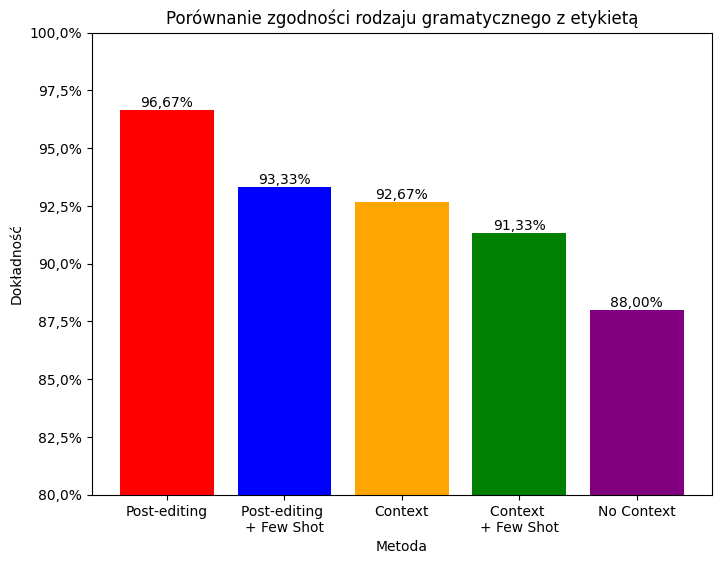

In [11]:
import matplotlib.pyplot as plt

# Accuracies calculated from the data
no_context_accuracy = no_context_good / (no_context_good + no_context_bad)
with_context_accuracy = with_context_good / (with_context_good + with_context_bad)
with_context_two_steps_accuracy = with_context_two_steps_good / (with_context_two_steps_good + with_context_two_steps_bad)
few_shot_accuracy = few_shot_good / (few_shot_good + few_shot_bad)
few_shot_two_step_accuracy = few_shot_two_step_good / (few_shot_two_step_good + few_shot_two_step_bad)
# Data for the bar plot
contexts = ['Post-editing', 'Context', 'No Context', 'Context \n+ Few Shot', 'Post-editing \n+ Few Shot']
accuracies = [with_context_two_steps_accuracy, with_context_accuracy, no_context_accuracy, few_shot_accuracy, few_shot_two_step_accuracy]
sorted_pairs = sorted(zip(accuracies, contexts), reverse=True)
accuracies, contexts = zip(*sorted_pairs)
# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(contexts, accuracies, color=['red', 'blue', 'orange', 'green', 'purple'])
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x*100:.1f}".replace('.', ',') + '%'))
# Add accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2%}'.replace('.', ','), ha='center', va='bottom')

# Add labels and title
plt.title('Porównanie zgodności rodzaju gramatycznego z etykietą')
plt.ylabel('Dokładność')
plt.xlabel('Metoda')
plt.ylim(0.8, 1)  # Set y-axis limits to 0-1 for percentage representation
plt.savefig(f"figs/gender_accuracy_comparision.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()